# Aliasing and False Contouring
----
`Roll: CS20B1016, Name: V Nagasai`

----
**<u>Objective</u>**: To understand the concept of aliasing and false contouring.

1. Convert the given Lena image to gray scale image. Use the cv2.resize() to down sample
the image with 4 sizes $(128*128, 64*64, 32*32, \text{ and } 16*16)$. Display the original image,
and down sampled images with the same display size. Observe what happens.
2. Down sample the grayscale Lena image with 8 different intensity ranges of values $(0-255, 0-128, 0-64, 0-32, 0-16, 0-8, 0-4, \text{ and } 0-2)$. (Note: Size of images are the same).
And display all those 8 down sampled images in the same size display area on the
screen. Observe what happens.

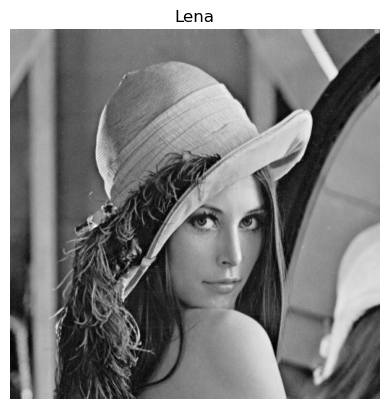

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Lena")
plt.show()

In [9]:
#Function for plotting array of images
def plot_images(images, rows, cols):
	plt.figure(figsize=(2.2*cols, 2.2*rows))
	plt.subplots_adjust(bottom=0.0, left=.01, right=.99, top=.90, hspace=.20)
	for i in range(rows*cols):
		plt.subplot(rows, cols, i+1)
		plt.imshow(images[i], cmap="gray")
		plt.title(f"Image {i+1}")
		plt.axis("off")

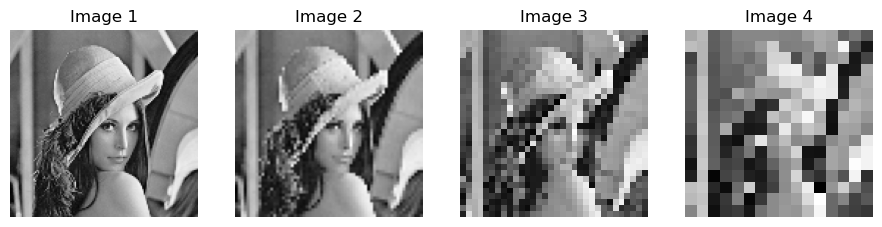

In [11]:
def down_sample_builtin(img:np.ndarray, sizes:list):
	images = []
	for (height, width) in sizes:
		images.append(cv2.resize(img, dsize=(height, width)))
	return images

images = down_sample_builtin(img, sizes=[(128, 128), (64, 64), (32, 32), (16, 16)])
plot_images(images, 1, 4)

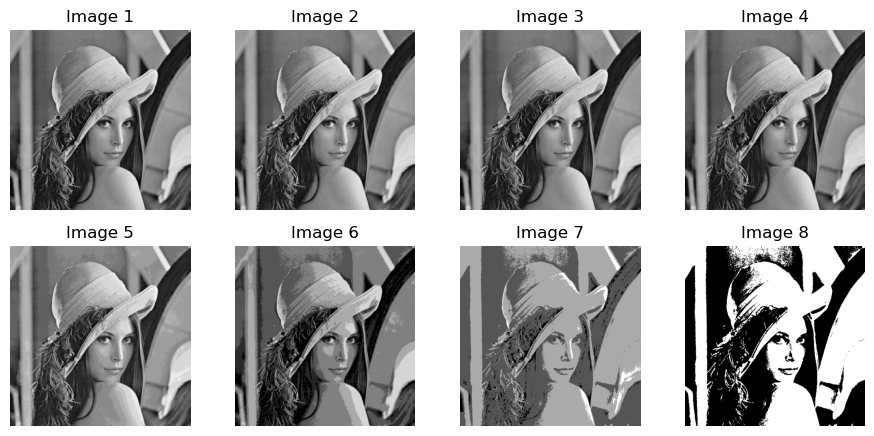

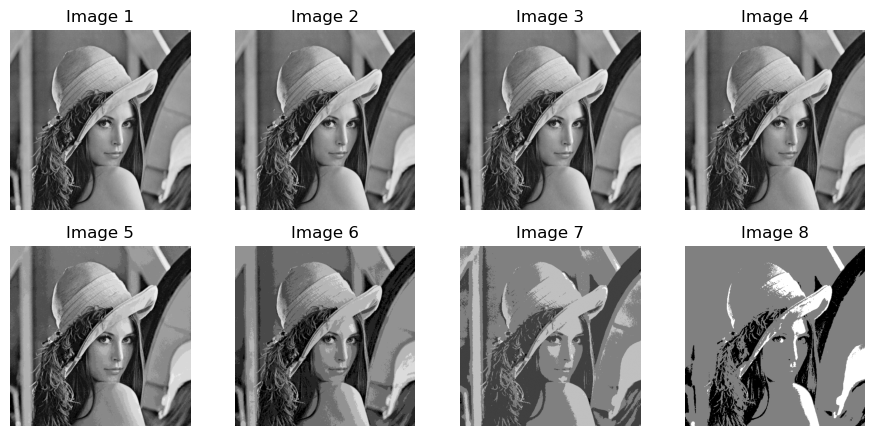

In [18]:
def down_sample_user(img:np.ndarray, ranges:list):
	images = []
	height, width = img.shape
	old_min, old_max = 0, 255
	for (new_min, new_max) in ranges:
		image = np.empty((height, width))
		for i in range(height):
			for j in range(width):
				image[i][j] = round(((img[i][j]-old_min)/(old_max-old_min))*new_max + new_min)
		images.append(image)
	return images

images = down_sample_user(img, ranges=[(0, 255), (0, 127), (0, 63), (0, 31), (0, 15), (0, 7), (0, 3), (0, 1)])
plot_images(images, 2, 4)
images = down_sample_user(img, ranges=[(0, 255), (0, 128), (0, 64), (0, 32), (0, 16), (0, 8), (0, 4), (0, 2)])
plot_images(images, 2, 4)